In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
data = pd.read_csv('netflix_titles.csv')
data.info()

# дф состоит из телешоу и фильмов, доступных на Netflix по состоянию на 2019 год.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Line chart

In [4]:
# посмотрим, сколько шоу и фильмов выходило каждый год 
year = data.groupby('release_year')[['show_id']].count()
year

,show_id
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2017,1012
2018,1121
2019,996


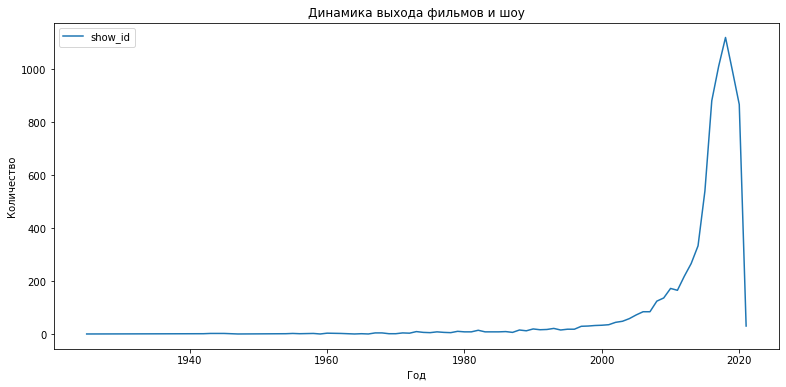

In [5]:
yr = year.plot(title='Динамика выхода фильмов и шоу', 
               xlabel='Год', 
               ylabel='Количество')

# Наблюдается подъем примерно с 2000-го года. Если изучить историю, то можно узнать, что в 2002 г. нетфликс 
# начали продавать свои акции, что привело к развитию услуги а проката, а в 2010 г. - к впечатляещему 
# подъему и популярности платформы

# Area chart

In [6]:
# теперь посмотрим выход фильмов и шоу по странам
# сразу рассматривать будем только 5 стран с самым большим количеством выпусков 
country = data.groupby('country')[['show_id']].count().sort_values(by = 'show_id', ascending = False).head(5)
country

,show_id
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183


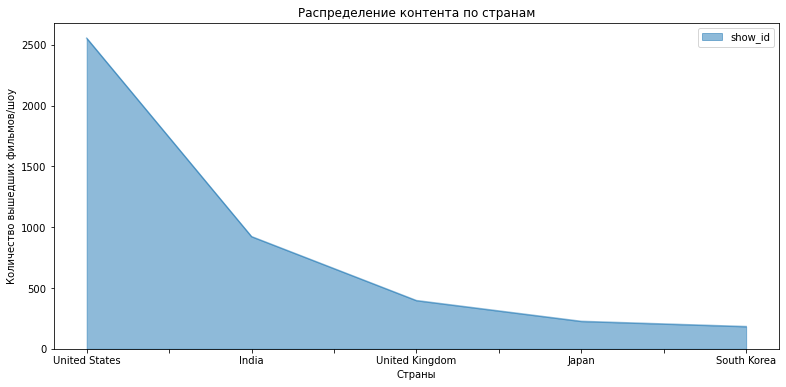

In [7]:
ax = country.plot(kind='area',
                             stacked=False,
                             title='Распределение контента по странам', 
                             xlabel='Страны', 
                             ylabel='Количество вышедших фильмов/шоу')

# На графике четко видно, что напервом месте по производству Штаты, причем с большим отрывом
# Это не удивительно, так как киноиндустрия США является не только самой крупной в мире, 
# но и оказывает серьезное влияние на мировой кинематограф в целом

# Bar chart

In [9]:
# посмотрим, какие режиссеры снимали больше фильмов 
director = data.groupby('director')[['show_id']].count().sort_values(by = 'show_id', ascending = False).head(10) 
director

,show_id
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Jay Chapman,12
Youssef Chahine,12
Steven Spielberg,10
David Dhawan,9


<AxesSubplot:xlabel='director', ylabel='show_id'>

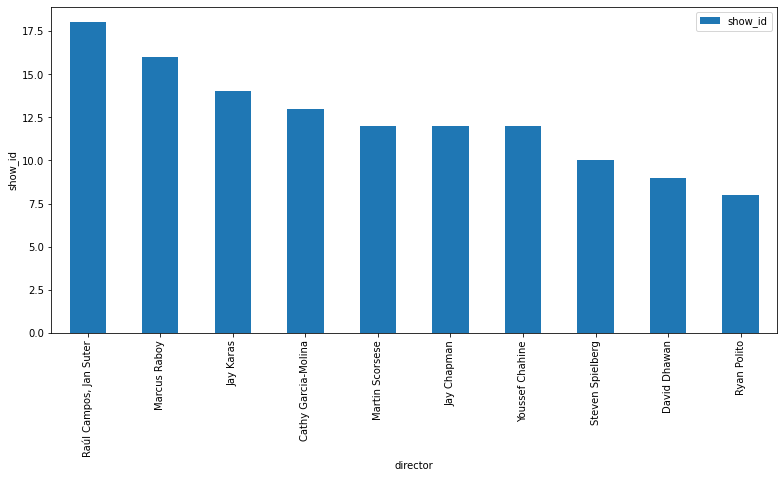

In [10]:
director.plot(kind = 'bar', xlabel = 'director', ylabel = 'show_id')

# Boxplot

In [11]:
# добавляю еще один датафрейм с информацией о рейтингах
df = pd.read_csv('TV Shows - Netflix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Titles       50 non-null     object 
 1   Year         50 non-null     int64  
 2   Rating       50 non-null     object 
 3   IMDB_Rating  50 non-null     float64
 4   Netflix      50 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


<AxesSubplot:title={'center':'Распределение оценок в IMBD'}>

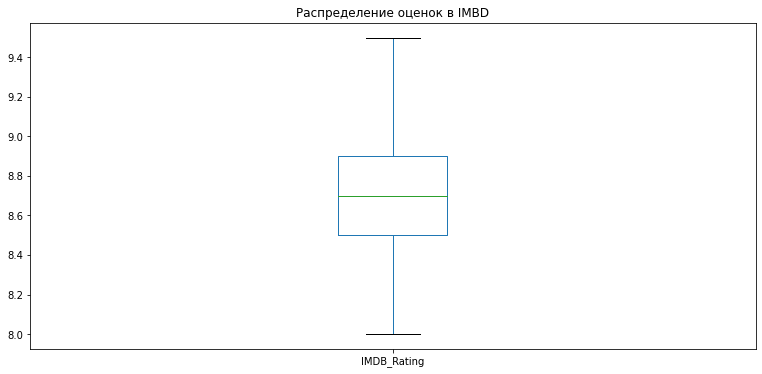

In [12]:
# Посмотрим, какие оценки ставят чаще всего
df.IMDB_Rating.plot(kind='box',
                   title='Распределение оценок в IMBD')

# Очевидно, что чаще всего ставят достаточно высокие оценки - с 8 до 9

# Heatmap

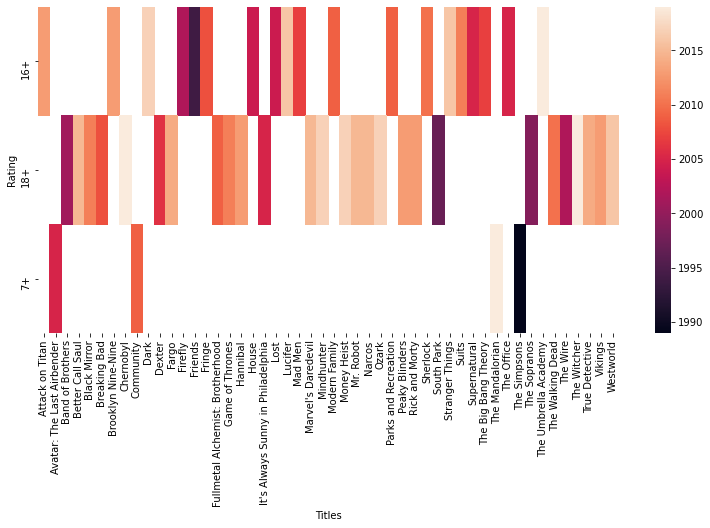

In [13]:
# Посмотрим, какой возрастной рейтинг встречается чаще всего и как это зависит от годы выпуска
rat_dist = df.pivot_table("Year", index = "Rating", columns = "Titles")
hm = sns.heatmap(rat_dist)

# Чаще всего снимают фильмы и шоу с рейтингом 18+
# При этом рейтинг 18+ стал более популярен после ~2010г., до этого чаще снимались фильмы 16+